<a href="https://colab.research.google.com/github/LarsHadidi/PRONTO/blob/mathprogram/PDP-GEO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Progressive Dinner Party: Geometric Program

# Method: Solving clustered subsets

Clustering is the task of grouping a set of objects in such a way that objects in the same group (called a cluster) are more similar to each other than to those in other groups.

<img alt="clusters" src="https://raw.githubusercontent.com/benedekrozemberczki/awesome-community-detection/master/coms.png" width="25%"/>

## Imports

In [2]:
import itertools
import numpy as np
from sklearn import svm
from sklearn import cluster
from sklearn import multiclass
import matplotlib.pyplot as plt

## Data

In [7]:
n = 300
k = 3
sd = 0.1

rng = np.random.default_rng()

points = {}
centers = rng.uniform(-1, 1, (k, 2))

for i in range(k):
    points[str(centers[i])] = rng.normal(centers[i], sd, (n // k, 2))

X = np.array(list(points.values())).reshape(n, 2)[:, 0]
Y = np.array(list(points.values())).reshape(n, 2)[:, 1]

C = np.empty((n, n))
for a, b in itertools.product(range(n), range(n)):
    dX = (X[b] - X[a]) * (X[b] - X[a])
    dY = (Y[b] - Y[a]) * (Y[b] - Y[a])
    C[a, b] = np.sqrt(dX + dY)

data = np.column_stack((X,Y))

##Clustering

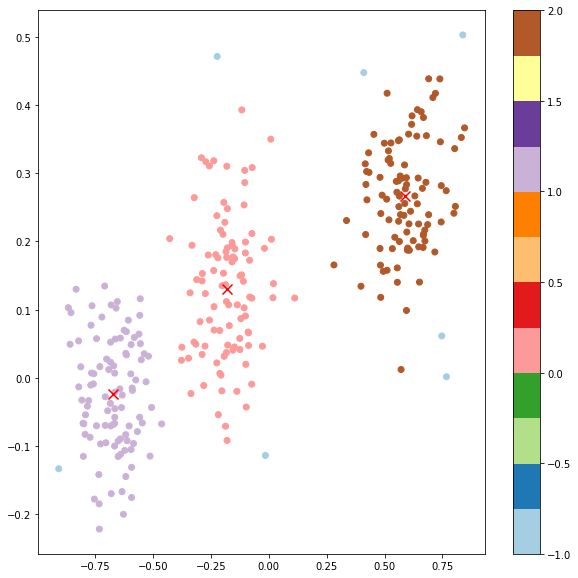

In [15]:
raw_labels = cluster.DBSCAN(eps=0.1).fit_predict(data)
centroids = np.array([np.mean(data[raw_labels==label,:], axis=0) for label in set(raw_labels) if label != -1])

plt.figure(figsize=(10,10))
plt.scatter(X,Y,c=raw_labels, cmap='Paired')
plt.colorbar()
plt.scatter(centroids[:,0],centroids[:,1], color='red', marker='x', s=100)
plt.show()

## SVM Post-Processing

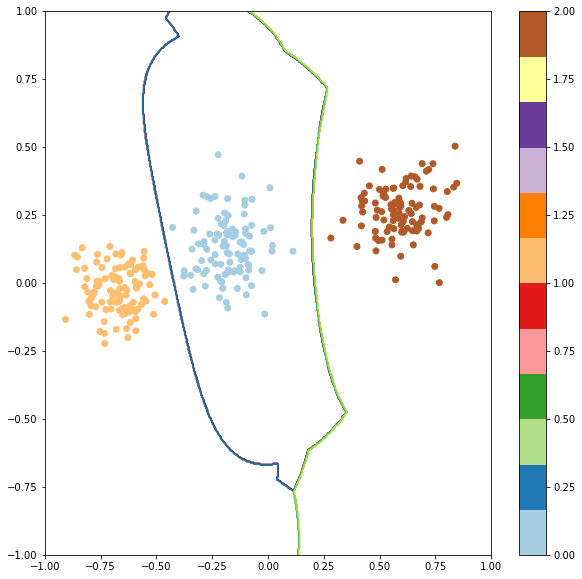

In [16]:
multi_svm = multiclass.OneVsOneClassifier(svm.SVC()).fit(data[raw_labels!=-1,:], [label for label in raw_labels if label != -1])
LOD = 500
xx, yy = np.meshgrid(np.linspace(np.floor(min(data[:,0])), np.ceil(max(data[:,0])), LOD), np.linspace(np.floor(min(data[:,1])), np.ceil(max(data[:,1])), LOD))
xy = np.array(list(zip(xx.ravel(),yy.ravel())))
Z = np.array(multi_svm.predict(xy)).reshape(xx.shape)



labels = raw_labels.copy()
if len(data[raw_labels == -1,:]) > 0:
  labels[raw_labels == -1] = multi_svm.predict(data[raw_labels == -1,:])
plt.figure(figsize=(10,10))
plt.contour(xx, yy, Z)
plt.scatter(X,Y,c=labels, cmap='Paired')
plt.colorbar()
plt.show()